Implementar almenos tres árboles de decisión distintos para clasificar los datos en las diferentes categorías del conjunto (setosa, versicolor y virgínica). Para ello debes usar en cada uno de ellos al menos dos hiperparámetros distintos. Representa gráficamente el árbol de decisión, tanto en formato árbol invertido (nodos, ramas y hojas) como en un eje cartesiano XY. Comprueba la bondad del ajuste de cada uno de los modelos (ROC-AUC).

Importar librerías

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Árboles de decisión

Cargar datos

In [7]:
# Cargamos los datos de iris desde ./datasets/iris_extended_300.csv
# path = './datasets/iris_extended_300.csv'

# df = pd.read_csv(path)

In [8]:
import os
from pathlib import Path

ROOT = Path(os.getenv("PYTHONPATH"))

df = pd.read_csv(ROOT / 'data' / 'iris_extended_300.csv')

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,synthetic
0,5.1,3.5,1.4,0.2,0,False
1,4.9,3.0,1.4,0.2,0,False
2,4.7,3.2,1.3,0.2,0,False
3,4.6,3.1,1.5,0.2,0,False
4,5.0,3.6,1.4,0.2,0,False


Preparar datos de entrenamiento y pruebas

In [9]:
# Obtenemos características y etiquetas
petal_features = ['petal length (cm)', 'petal width (cm)']
X = df[petal_features].values
y = df['species'].values

# Dividir el conjunto de datos en entrenamiento y prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Árboles de decisión

In [10]:
primer_arbol = DecisionTreeClassifier(max_depth=2, min_samples_split=4, random_state=42)
primer_arbol.fit(X_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",2
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",4
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current no

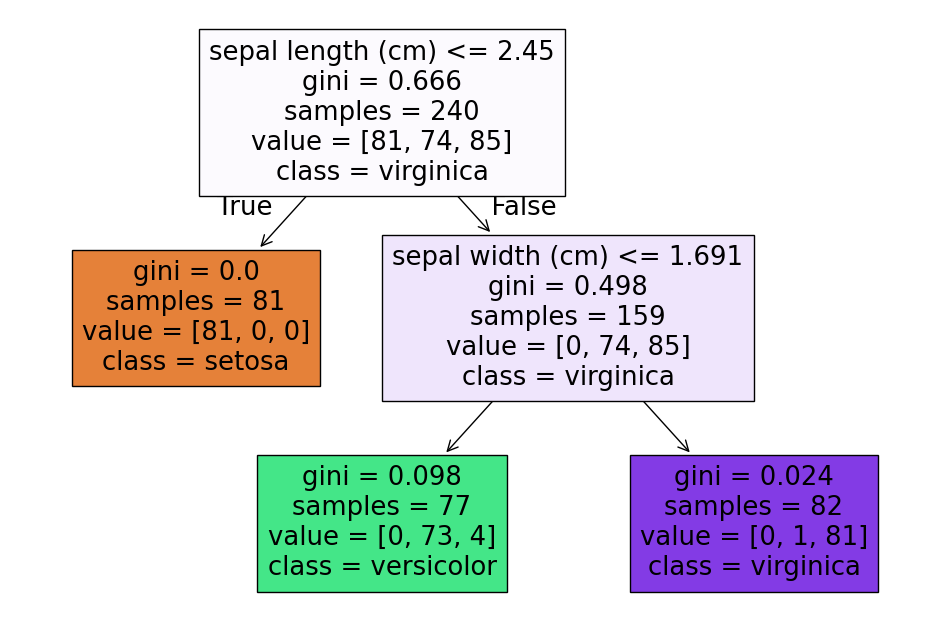

In [11]:
# Representar el primer árbol
clase_map = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}

plt.figure(figsize=(12,8))
plot_tree(
    primer_arbol,
    filled=True,
    feature_names=df.select_dtypes(include=['float64', 'int64']).columns,
    class_names=[clase_map[i] for i in range(3)]
)
plt.show()

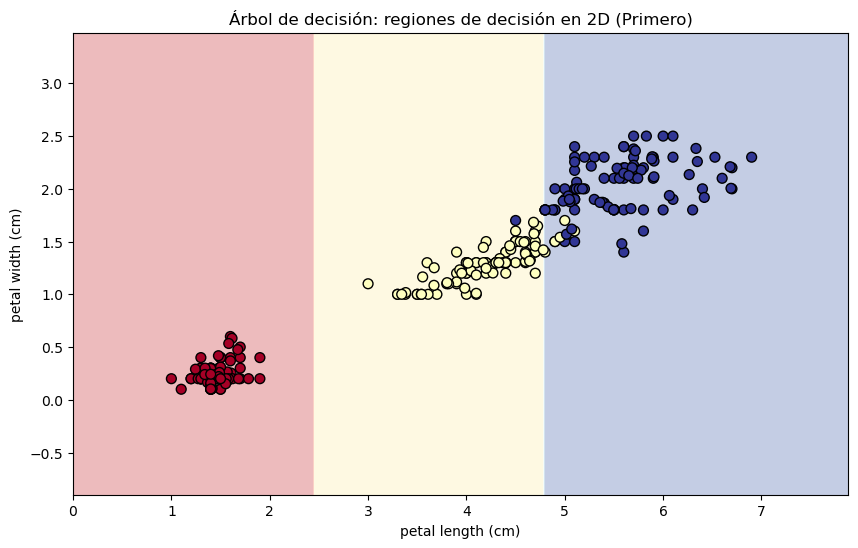

In [12]:
# Representar el primer árbol en plano 2D
features = ['petal length (cm)', 'petal width (cm)']
X_2d = df[features].values
y_2d = y  # target original

# Entrenamos un árbol con solo estas 2 features
primer_arbol_2d = DecisionTreeClassifier(max_depth=2, random_state=42)
primer_arbol_2d.fit(X_2d, y_2d)

# Creamos la malla XY
x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predecimos para cada punto de la malla
Z = primer_arbol_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficamos
plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=pd.factorize(y_2d)[0], s=50, cmap=plt.cm.RdYlBu, edgecolor='k')
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title("Árbol de decisión: regiones de decisión en 2D (Primero)")
plt.show()

In [13]:
segundo_arbol = DecisionTreeClassifier(max_depth=4, min_samples_split=10, random_state=42)
segundo_arbol.fit(X_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",4
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",10
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current n

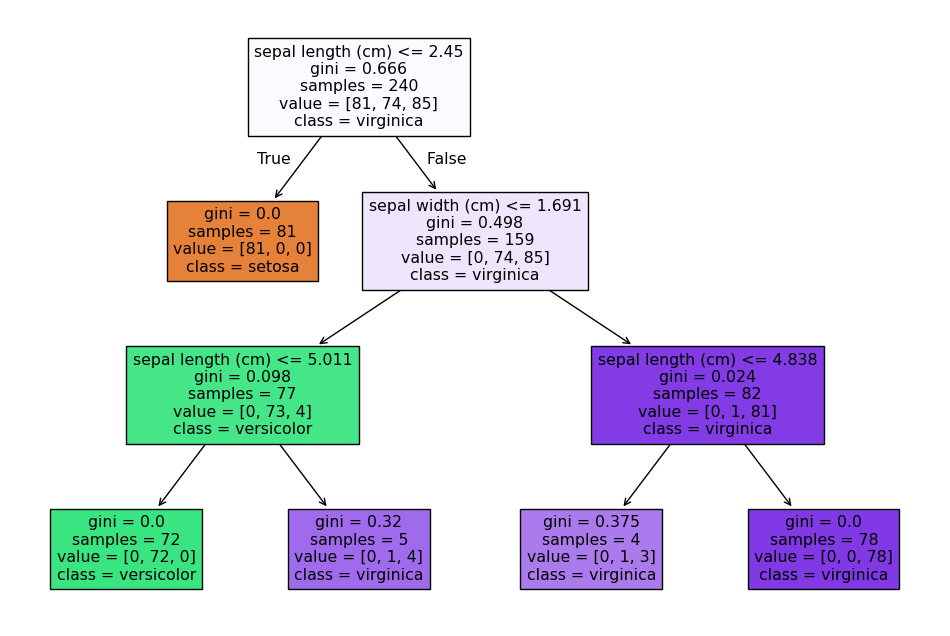

In [14]:
# Representar el segundo árbol
plt.figure(figsize=(12,8))
plot_tree(
    segundo_arbol,
    filled=True,
    feature_names=df.select_dtypes(include=['float64', 'int64']).columns,
    class_names=[clase_map[i] for i in range(3)]
)
plt.show()

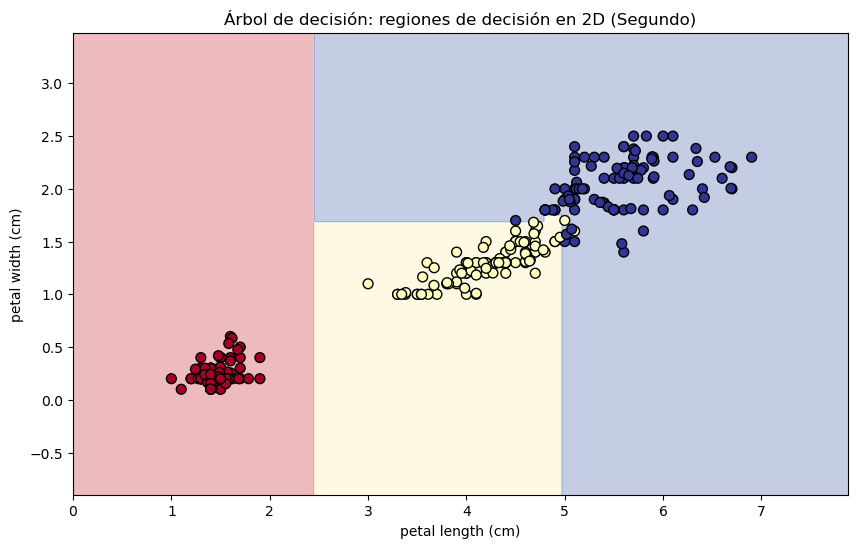

In [15]:
# Representación 2D del segundo árbol
features = ['petal length (cm)', 'petal width (cm)']
X_2d = df[features].values
y_2d = y

segundo_arbol_2d = DecisionTreeClassifier(max_depth=4, random_state=42)
segundo_arbol_2d.fit(X_2d, y_2d)

x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = segundo_arbol_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=pd.factorize(y_2d)[0], s=50, cmap=plt.cm.RdYlBu, edgecolor='k')
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title("Árbol de decisión: regiones de decisión en 2D (Segundo)")
plt.show()

In [16]:
tercer_arbol = DecisionTreeClassifier(max_depth=8, min_samples_split=20, random_state=42)
tercer_arbol.fit(X_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",8
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",20
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current n

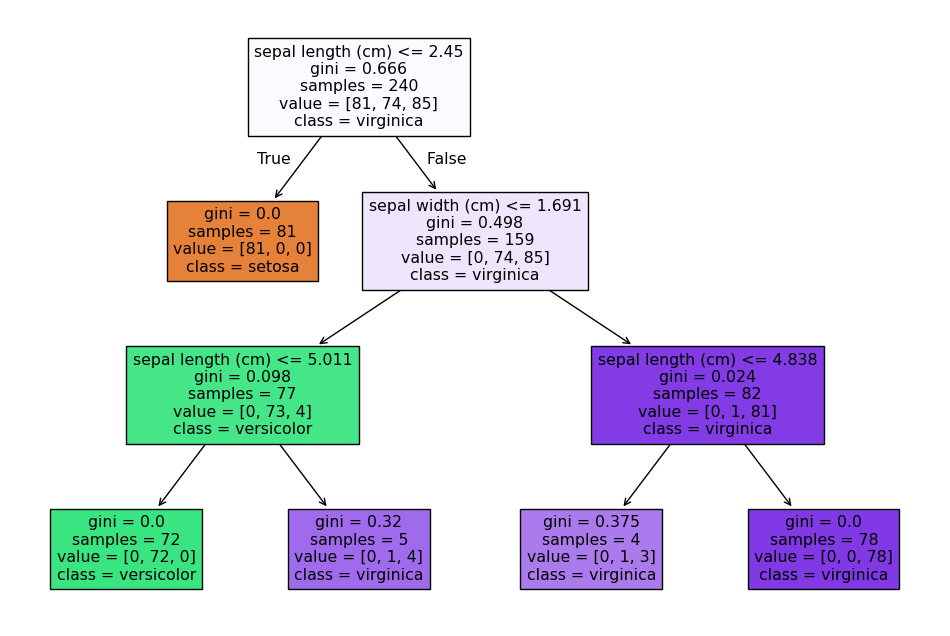

In [17]:
# Representar el tercer árbol
plt.figure(figsize=(12,8))
plot_tree(
    tercer_arbol,
    filled=True,
    feature_names=df.select_dtypes(include=['float64', 'int64']).columns,
    class_names=[clase_map[i] for i in range(3)]
)
plt.show()

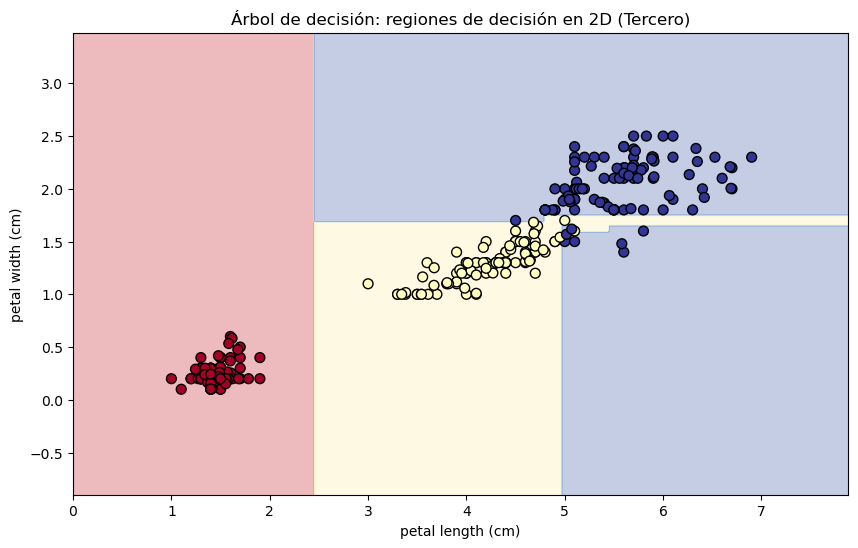

In [18]:
# Representación 2D del tercer árbol
features = ['petal length (cm)', 'petal width (cm)']
X_2d = df[features].values
y_2d = y

tercer_arbol_2d = DecisionTreeClassifier(max_depth=8, random_state=42)
tercer_arbol_2d.fit(X_2d, y_2d)
x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = tercer_arbol_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=pd.factorize(y_2d)[0], s=50, cmap=plt.cm.RdYlBu, edgecolor='k')
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title("Árbol de decisión: regiones de decisión en 2D (Tercero)")
plt.show()

Comprobar bondades de ajustes

In [19]:
# Comprobamos las métricas de los tres árboles utilizando ROC AUC

y_pred_primer = primer_arbol.predict_proba(X_test)
y_pred_segundo = segundo_arbol.predict_proba(X_test)
y_pred_tercer = tercer_arbol.predict_proba(X_test)

roc_auc_primer = roc_auc_score(y_test, y_pred_primer, multi_class='ovr')
roc_auc_segundo = roc_auc_score(y_test, y_pred_segundo, multi_class='ovr')
roc_auc_tercer = roc_auc_score(y_test, y_pred_tercer, multi_class='ovr')

print(f"ROC AUC Primer Árbol: {roc_auc_primer:.4f}")
print(f"ROC AUC Segundo Árbol: {roc_auc_segundo:.4f}")
print(f"ROC AUC Tercer Árbol: {roc_auc_tercer:.4f}")


ROC AUC Primer Árbol: 0.9595
ROC AUC Segundo Árbol: 0.9726
ROC AUC Tercer Árbol: 0.9726


# GridSearchCV

Crea con GridSearchCV y como mínimo cuatro hiperparámetros con distintos valores cada uno (según hemos visto en las diapositivas). con todo ello, crea un modelo de clasificación optmizado.

In [20]:
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='roc_auc_ovr')

grid_search.fit(X_train, y_train)

print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Modelo optimizado
best_tree = grid_search.best_estimator_
y_pred_best = best_tree.predict_proba(X_test)
roc_auc_best = roc_auc_score(y_test, y_pred_best, multi_class='ovr', average='macro')
print(f"ROC AUC del modelo optimizado: {roc_auc_best:.4f}")

Mejores hiperparámetros encontrados:
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
ROC AUC del modelo optimizado: 0.9730
